One of the top 5 pharmaceutical companies, Axtratia, headquartered in the US, had launched Axtenna, a drug for the treatment of stage 1 chronic kidney disease, 2.5 years ago. However, some physicians are yet to prescribe it for the first time. A key client stakeholder has reached out to a Decision Sciences Principal in Axtria for help to identify potential physicians who are most likely to start prescribing the drug in the next quarter in order to channelize the marketing efforts more effectively while targeting potential physicians.

# My task

# To create a model that identifies the prospective physicians who have high likelihood to start prescribing the drug in 11th quarter for the first time. You are expected to use the input data files to perform any exploratory data analysis, feature engineering, and to develop a model.

In [275]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [276]:
#loading the datasets
#Note: I have converted Excel file into csv
df1=pd.read_csv("df1.csv")
df2=pd.read_csv("df2.csv")

In [395]:
df1.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,0.91,0.89,1,58,83,0
1,2,0.21,0.89,1,41,71,1
2,3,1.00,0.58,1,38,71,0
3,4,0.96,0.96,1,42,69,0
4,5,1.00,0.20,1,38,69,0


In [396]:
df2.head()

,physician_id,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.0
1,1,0,10,11,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,3.0
2,1,1,8,8,0,0,0,0,0,1,...,15,0,0,0,0,1,1,109,19,3.0
3,1,1,11,24,0,0,0,0,0,1,...,29,0,0,0,0,1,1,204,18,3.0
4,1,1,15,44,0,0,0,0,0,1,...,35,0,0,0,0,1,1,180,37,3.0


In [397]:
#lets check the shapes of tables
print(df1.shape)
print(df2.shape)

(10000, 7)
(100000, 25)


In [398]:
#checking the data types
print(df2.dtypes)
print(df1.dtypes)

physician_id                                      int64
brand_prescribed                                  int64
total_representative_visits                       int64
total_sample_dropped                              int64
saving_cards_dropped                              int64
vouchers_dropped                                  int64
total_seminar_as_attendee                         int64
total_seminar_as_speaker                          int64
physician_hospital_affiliation                    int64
physician_in_group_practice                       int64
total_prescriptions_for_indication1               int64
total_prescriptions_for_indication2               int64
total_prescriptions_for_indication3               int64
total_patient_with_commercial_insurance_plan      int64
total_patient_with_medicare_insurance_plan        int64
total_patient_with_medicaid_insurance_plan        int64
brand_web_impressions                             int64
brand_ehr_impressions                           

In [281]:
#checking the column values
print(df1.columns)
print(df2.columns)

Index(['physician_id', 'urban_population_perc_in_physician_locality',
       'percent_population_with_health_insurance_in_last10q',
       'physician_gender', 'physician_tenure', 'physician_age',
       'physician_speciality'],
      dtype='object')
Index(['physician_id', 'year_quarter', 'brand_prescribed',
       'total_representative_visits', 'total_sample_dropped',
       'saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee',
       'total_seminar_as_speaker', 'physician_hospital_affiliation',
       'physician_in_group_practice', 'total_prescriptions_for_indication1',
       'total_prescriptions_for_indication2',
       'total_prescriptions_for_indication3',
       'total_patient_with_commercial_insurance_plan',
       'total_patient_with_medicare_insurance_plan',
       'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions',
       'brand_ehr_impressions', 'brand_enews_impressions',
       'brand_mobile_impressions', 'brand_organic_web_visits',
   

In [282]:
#checking info
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   physician_id                                         10000 non-null  int64  
 1   urban_population_perc_in_physician_locality          10000 non-null  float64
 2   percent_population_with_health_insurance_in_last10q  10000 non-null  float64
 3   physician_gender                                     10000 non-null  object 
 4   physician_tenure                                     10000 non-null  int64  
 5   physician_age                                        10000 non-null  int64  
 6   physician_speciality                                 10000 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 547.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data colu

In [283]:
df1.describe(include="all")

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
count,10000.00000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,3,NaN,NaN,3
top,NaN,NaN,NaN,M,NaN,NaN,nephrology
freq,NaN,NaN,NaN,5611,NaN,NaN,7768
mean,5000.50000,0.920926,0.643073,NaN,28.058500,60.116900,NaN
std,2886.89568,0.167222,0.322049,NaN,13.326959,14.073231,NaN
min,1.00000,0.000000,0.010000,NaN,3.000000,28.000000,NaN
25%,2500.75000,0.930000,0.350000,NaN,18.000000,51.000000,NaN
50%,5000.50000,1.000000,0.840000,NaN,29.000000,61.000000,NaN
75%,7500.25000,1.000000,0.920000,NaN,38.000000,70.000000,NaN


In [284]:
df2.describe(include="all")

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,48902
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18767
mean,5000.500000,201902.500000,0.453850,7.506650,9.702910,0.74199,0.125300,0.136530,0.04013,0.185100,...,40.610380,1.733090,1.593150,0.204750,0.310640,0.842560,0.901500,337.530720,51.999210,NaN
std,2886.765765,77.078592,0.497868,6.672713,26.254091,3.26853,1.255713,0.405131,0.70429,0.388381,...,104.658218,7.594929,11.755728,0.741912,1.961122,0.364217,0.297991,393.584016,87.135455,NaN
min,1.000000,201802.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2500.750000,201804.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.000000,2.000000,NaN
50%,5000.500000,201902.500000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,236.000000,23.000000,NaN
75%,7500.250000,202001.000000,1.000000,11.000000,9.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,28.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,475.000000,66.000000,NaN


In [285]:
#Observation
# brand prescribed is the target variable
#we need to deal with null values in physician_segment and date time format value of year_quarter

# Data Cleaning and pre processing

In [286]:
print(df1.isnull().sum())
print(df2.isnull().sum())

physician_id                                           0
urban_population_perc_in_physician_locality            0
percent_population_with_health_insurance_in_last10q    0
physician_gender                                       0
physician_tenure                                       0
physician_age                                          0
physician_speciality                                   0
dtype: int64
physician_id                                        0
year_quarter                                        0
brand_prescribed                                    0
total_representative_visits                         0
total_sample_dropped                                0
saving_cards_dropped                                0
vouchers_dropped                                    0
total_seminar_as_attendee                           0
total_seminar_as_speaker                            0
physician_hospital_affiliation                      0
physician_in_group_practice                     

In [287]:
#More than 50% of the data in physician_segment is missing lets check the importance of this feature
print(df2["physician_segment"].value_counts())
df2["physician_segment"]=df2["physician_segment"].map({'High':3, 'Very High':4,'Medium':2,"Low":1})

High         18767
Very High    15856
Medium        9212
Low           5067
Name: physician_segment, dtype: int64


In [288]:
print(df2["physician_segment"].value_counts())

3.0    18767
4.0    15856
2.0     9212
1.0     5067
Name: physician_segment, dtype: int64


In [289]:
df2[["physician_segment","brand_prescribed"]].corr()
#since corelation is good we cannot drop the colum we need to impute

,physician_segment,brand_prescribed
physician_segment,1.000000,0.198331
brand_prescribed,0.198331,1.000000


In [290]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="most_frequent")
df2["physician_segment"]=si.fit_transform(df2["physician_segment"].values.reshape(-1,1))
print(df2["physician_segment"].value_counts())

3.0    69865
4.0    15856
2.0     9212
1.0     5067
Name: physician_segment, dtype: int64


In [291]:
#lets impute physician genger and speciality also
print(df1["physician_gender"].value_counts())
print("\n")
print(df1["physician_speciality"].value_counts())

M          5611
F          4385
Unknown       4
Name: physician_gender, dtype: int64


nephrology    7768
other         1624
urology        608
Name: physician_speciality, dtype: int64


In [292]:
df1["physician_gender"]=df1["physician_gender"].map({'Unknown':1, 'M':1,'F':0})
df1["physician_speciality"]=df1["physician_speciality"].map({'nephrology':0, 'other':1,'urology':2})

In [293]:
df2.drop(["year_quarter",],axis=1,inplace=True)


In [294]:
#Now we have encoded all the catagorical features and filled all null values we can perform EDA

In [295]:
df2.columns

Index(['physician_id', 'brand_prescribed', 'total_representative_visits',
       'total_sample_dropped', 'saving_cards_dropped', 'vouchers_dropped',
       'total_seminar_as_attendee', 'total_seminar_as_speaker',
       'physician_hospital_affiliation', 'physician_in_group_practice',
       'total_prescriptions_for_indication1',
       'total_prescriptions_for_indication2',
       'total_prescriptions_for_indication3',
       'total_patient_with_commercial_insurance_plan',
       'total_patient_with_medicare_insurance_plan',
       'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions',
       'brand_ehr_impressions', 'brand_enews_impressions',
       'brand_mobile_impressions', 'brand_organic_web_visits',
       'brand_paidsearch_visits', 'total_competitor_prescription',
       'new_prescriptions', 'physician_segment'],
      dtype='object')

In [296]:
list1=['physician_id', 'brand_prescribed', 'total_representative_visits',
       'total_sample_dropped', 'saving_cards_dropped', 'vouchers_dropped',
       'total_seminar_as_attendee', 'total_seminar_as_speaker',
       'physician_hospital_affiliation', 'physician_in_group_practice',
       'total_prescriptions_for_indication1',
       'total_prescriptions_for_indication2',
       'total_prescriptions_for_indication3',
       'total_patient_with_commercial_insurance_plan',
       'total_patient_with_medicare_insurance_plan',
       'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions',
       'brand_ehr_impressions', 'brand_enews_impressions',
       'brand_mobile_impressions', 'brand_organic_web_visits',
       'brand_paidsearch_visits', 'total_competitor_prescription',
       'new_prescriptions']

for i in list1:
      df3[i]=df2.groupby("physician_id").agg({i:"mean"})


In [297]:
df3["physician_id"]=df3.index
df3.reset_index(drop=True, inplace=True)

In [298]:
#lets  merge two data using merge operation 
df=pd.merge(df1, df3, how="outer", on=["physician_id"])
df.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,new_prescriptions,brand_prescribed,total_representative_visits,...,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription
0,1,0.91,0.89,1.0,58.0,83.0,0.0,25.6,0.8,9.4,...,24.7,57.9,23.5,2.1,0.4,0.2,0.2,0.7,0.9,136.4
1,2,0.21,0.89,1.0,41.0,71.0,1.0,26.2,0.3,0.3,...,37.2,49.9,3.1,1.0,0.0,0.0,0.6,0.8,0.9,163.7
2,3,1.00,0.58,1.0,38.0,71.0,0.0,58.2,0.8,17.6,...,200.4,181.6,17.0,1.0,0.5,0.2,0.3,0.9,0.9,555.0
3,4,0.96,0.96,1.0,42.0,69.0,0.0,20.7,0.4,9.2,...,112.7,58.3,14.0,0.7,3.6,0.0,0.0,0.9,0.9,258.7
4,5,1.00,0.20,1.0,38.0,69.0,0.0,7.5,0.2,4.3,...,31.7,0.9,0.0,0.9,0.3,0.2,0.2,0.9,0.9,43.4


In [299]:
df.isnull().sum()

physician_id                                           0
urban_population_perc_in_physician_locality            1
percent_population_with_health_insurance_in_last10q    1
physician_gender                                       1
physician_tenure                                       1
physician_age                                          1
physician_speciality                                   1
new_prescriptions                                      2
brand_prescribed                                       2
total_representative_visits                            2
total_sample_dropped                                   2
saving_cards_dropped                                   2
vouchers_dropped                                       2
total_seminar_as_attendee                              2
total_seminar_as_speaker                               2
physician_hospital_affiliation                         2
physician_in_group_practice                            2
total_prescriptions_for_indicat

In [300]:
df.fillna(method='ffill')

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,new_prescriptions,brand_prescribed,total_representative_visits,...,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription
0,1,0.91,0.89,1.0,58.0,83.0,0.0,25.6,0.8,9.4,...,24.7,57.9,23.5,2.1,0.4,0.2,0.2,0.7,0.9,136.4
1,2,0.21,0.89,1.0,41.0,71.0,1.0,26.2,0.3,0.3,...,37.2,49.9,3.1,1.0,0.0,0.0,0.6,0.8,0.9,163.7
2,3,1.00,0.58,1.0,38.0,71.0,0.0,58.2,0.8,17.6,...,200.4,181.6,17.0,1.0,0.5,0.2,0.3,0.9,0.9,555.0
3,4,0.96,0.96,1.0,42.0,69.0,0.0,20.7,0.4,9.2,...,112.7,58.3,14.0,0.7,3.6,0.0,0.0,0.9,0.9,258.7
4,5,1.00,0.20,1.0,38.0,69.0,0.0,7.5,0.2,4.3,...,31.7,0.9,0.0,0.9,0.3,0.2,0.2,0.9,0.9,43.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997,1.00,0.35,0.0,3.0,28.0,0.0,40.7,0.7,15.3,...,71.1,68.7,34.8,0.0,0.0,0.0,0.0,0.9,0.9,232.9
9997,9998,1.00,0.80,0.0,6.0,80.0,0.0,44.0,0.5,9.3,...,50.8,82.4,167.7,10.9,2.0,0.5,2.4,0.9,0.9,346.4
9998,9999,1.00,0.38,0.0,14.0,39.0,0.0,86.3,0.5,12.0,...,5.6,227.4,234.1,1.0,0.1,0.2,0.2,0.9,0.9,589.4
9999,10000,0.74,0.96,0.0,10.0,80.0,0.0,86.3,0.5,12.0,...,5.6,227.4,234.1,1.0,0.1,0.2,0.2,0.9,0.9,589.4


In [301]:
df.drop(df.tail(1).index, 
        inplace = True) 

In [302]:
a=[]
for i in df["brand_prescribed"]:
        if i>0.5:
            b=1
            a.append(b)  
        else:
            c=0
            a.append(c)
           
df["brand_prescribed"]=pd.DataFrame(a)

In [303]:
df["brand_prescribed"]

0       1
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    0
9999    0
Name: brand_prescribed, Length: 10000, dtype: int64

# EDA

In [304]:
df.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,new_prescriptions,brand_prescribed,total_representative_visits,...,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription
0,1,0.91,0.89,1.0,58.0,83.0,0.0,25.6,1,9.4,...,24.7,57.9,23.5,2.1,0.4,0.2,0.2,0.7,0.9,136.4
1,2,0.21,0.89,1.0,41.0,71.0,1.0,26.2,0,0.3,...,37.2,49.9,3.1,1.0,0.0,0.0,0.6,0.8,0.9,163.7
2,3,1.00,0.58,1.0,38.0,71.0,0.0,58.2,1,17.6,...,200.4,181.6,17.0,1.0,0.5,0.2,0.3,0.9,0.9,555.0
3,4,0.96,0.96,1.0,42.0,69.0,0.0,20.7,0,9.2,...,112.7,58.3,14.0,0.7,3.6,0.0,0.0,0.9,0.9,258.7
4,5,1.00,0.20,1.0,38.0,69.0,0.0,7.5,0,4.3,...,31.7,0.9,0.0,0.9,0.3,0.2,0.2,0.9,0.9,43.4


In [305]:
df.shape

(10000, 30)

Text(0.5, 1.0, 'brand prescribed vs physician speciality')

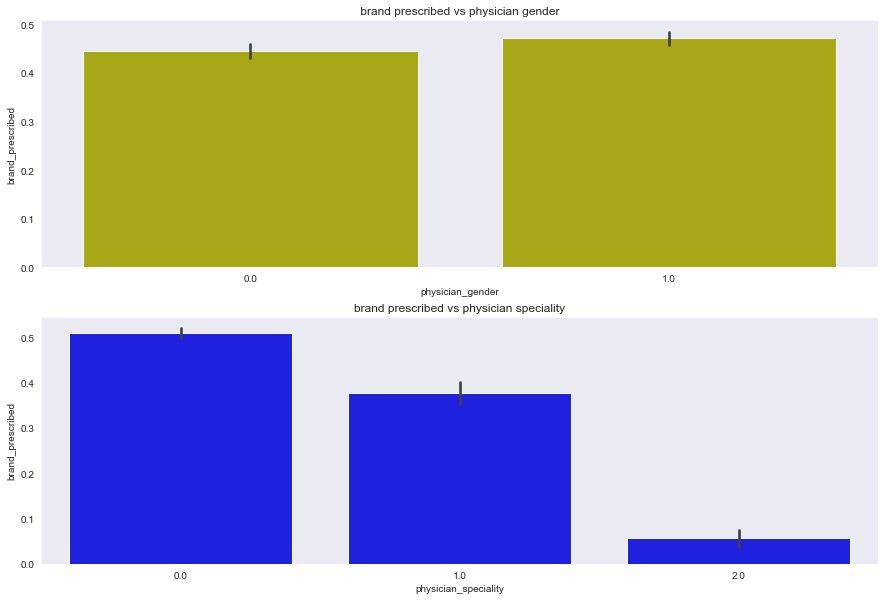

In [306]:
#now lets get some insights from this dataset
fig,(ax1,ax3) = plt.subplots(2,1,figsize=(15,10))
sns.barplot(y=df["brand_prescribed"],x=df["physician_gender"],ax=ax1,color="y")
ax1.set_title(" brand prescribed vs physician gender ")
sns.barplot(y=df["brand_prescribed"],x=df["physician_speciality"],ax=ax3,color="b")
ax3.set_title("brand prescribed vs physician speciality")


In [307]:
#Observation
#Male physicians prescribed more than female physicians
#physicians with 0(Neurology) prescribed most and 2(Urology ) prescribed least


Text(0.5, 1.0, 'brand_prescribed by different age group of physician')

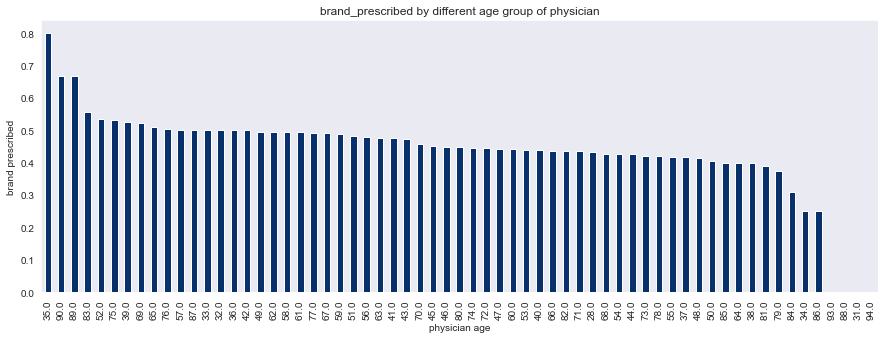

In [308]:
sns.set_style("dark")
plt.figure(figsize=(15,5))
df.groupby('physician_age')['brand_prescribed'].mean().sort_values(ascending=False).plot(kind='bar',cmap='Blues_r')
plt.xlabel('physician age')
plt.ylabel('brand prescribed')
plt.title("brand_prescribed by different age group of physician")

In [309]:
#Observation
# As we can see physician age is not a important parameter for brand prescribtion 

<AxesSubplot:>

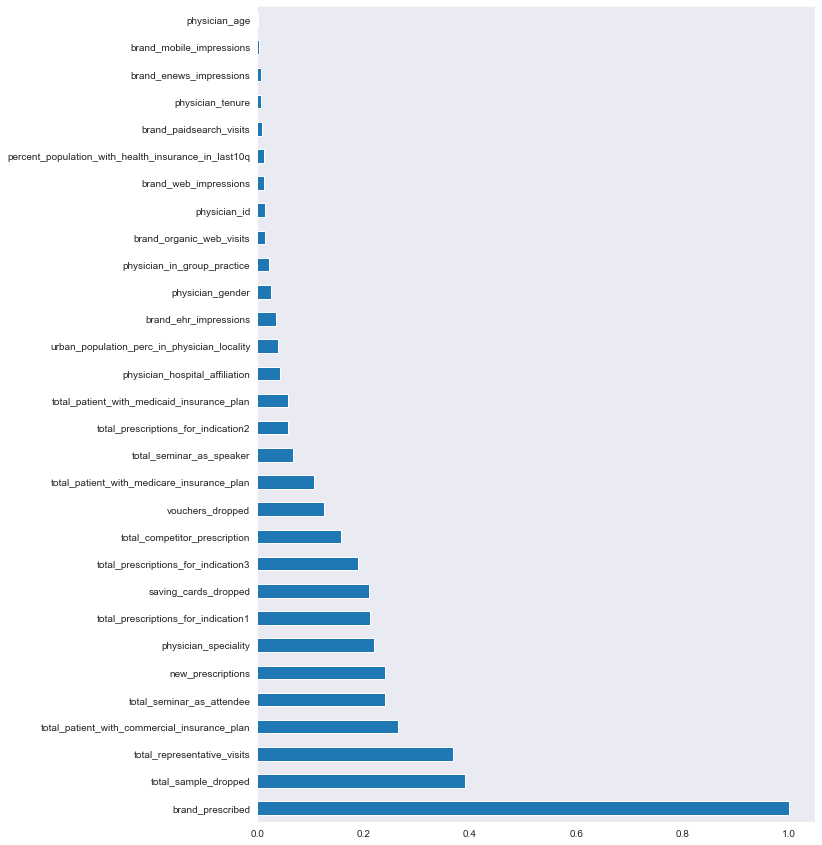

In [310]:
#lets check corelation of the various features
plt.figure(figsize=(10,15))
df.corr()["brand_prescribed"].abs().sort_values(ascending=False).plot.barh(stacked=True)

In [311]:
#Observation
#we can see features which are most and least important

Index(['physician_id', 'urban_population_perc_in_physician_locality',
       'percent_population_with_health_insurance_in_last10q',
       'physician_gender', 'physician_tenure', 'physician_age',
       'physician_speciality', 'new_prescriptions', 'brand_prescribed',
       'total_representative_visits', 'total_sample_dropped',
       'saving_cards_dropped', 'vouchers_dropped', 'total_seminar_as_attendee',
       'total_seminar_as_speaker', 'physician_hospital_affiliation',
       'physician_in_group_practice', 'total_prescriptions_for_indication1',
       'total_prescriptions_for_indication2',
       'total_prescriptions_for_indication3',
       'total_patient_with_commercial_insurance_plan',
       'total_patient_with_medicare_insurance_plan',
       'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions',
       'brand_ehr_impressions', 'brand_enews_impressions',
       'brand_mobile_impressions', 'brand_organic_web_visits',
       'brand_paidsearch_visits', 'total_com

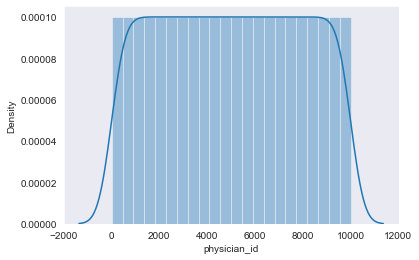

-3.183347155134243


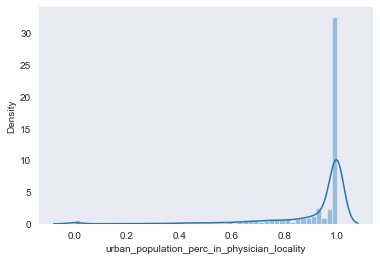

-0.5690033743389797


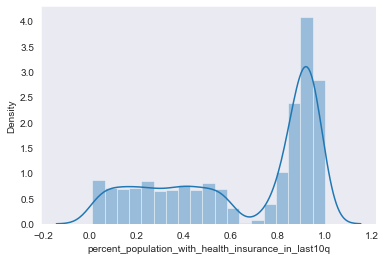

-0.24791944103578367


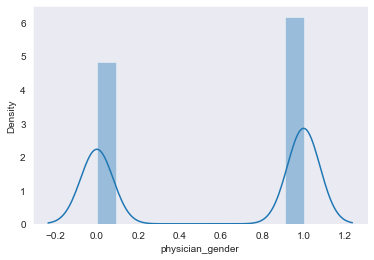

-0.06838377773675394


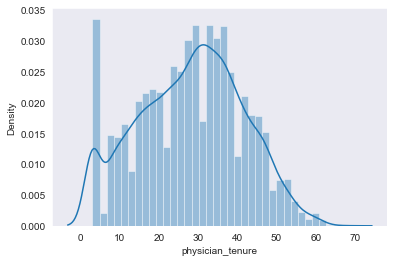

-0.4392456153544476


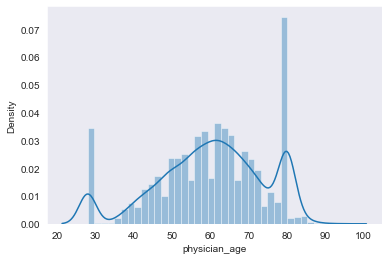

1.8846439743479722


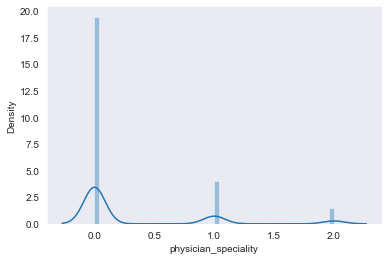

3.980431106550679


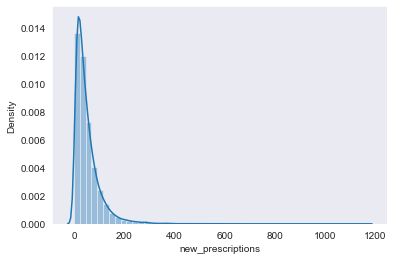

0.16134645474828838


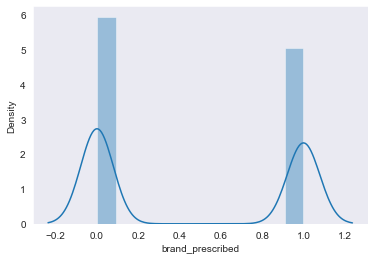

0.973600559736345


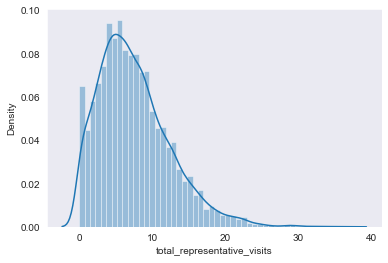

4.908003776363062


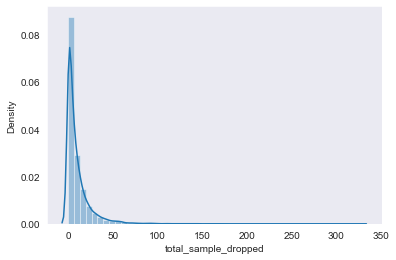

5.033426557583756


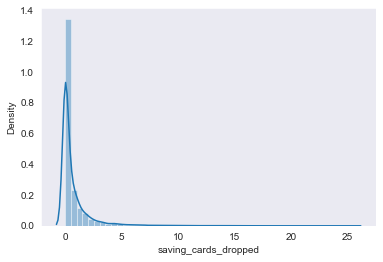

10.733463897072761


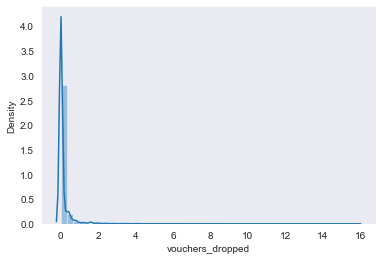

2.580136760688956


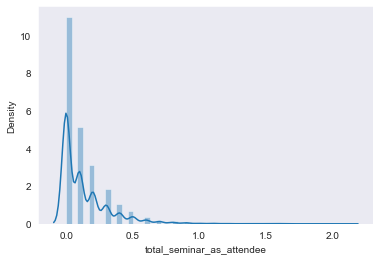

22.965274687333732


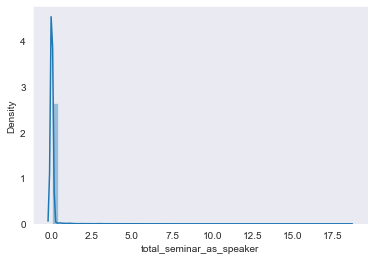

1.6216985636495225


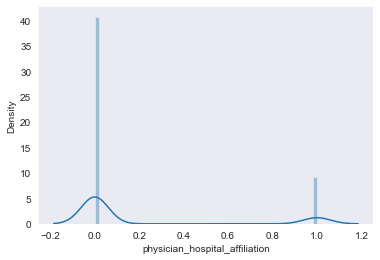

-4.579407424163372


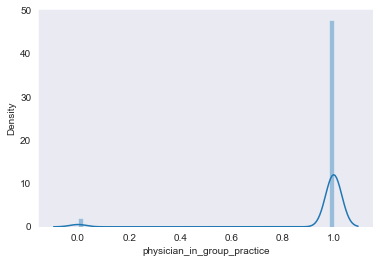

3.3237054021134003


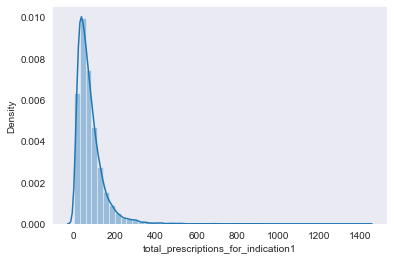

5.829455687149685


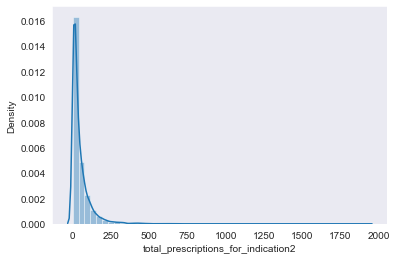

6.135373058515677


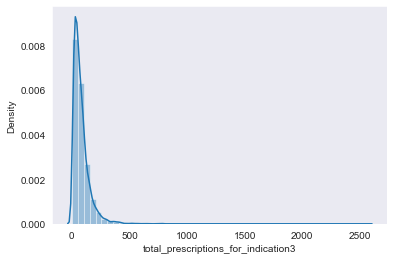

3.316987329881739


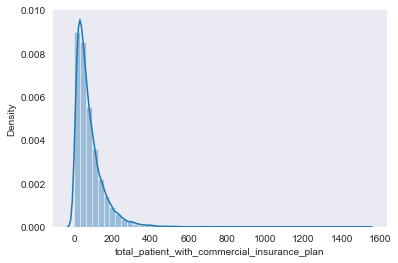

4.327788887851088


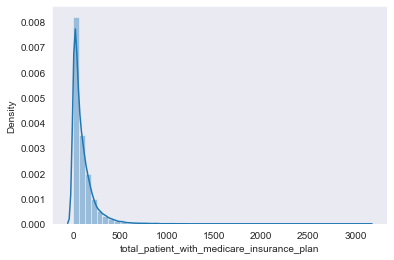

5.619923332618043


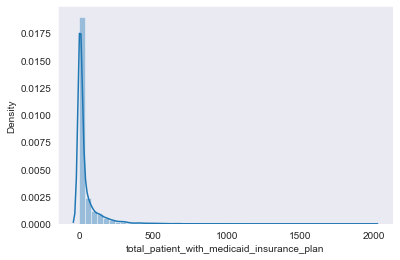

25.621980591514586


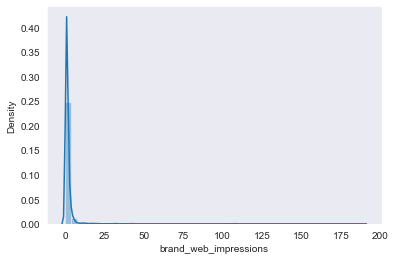

8.72637866802658


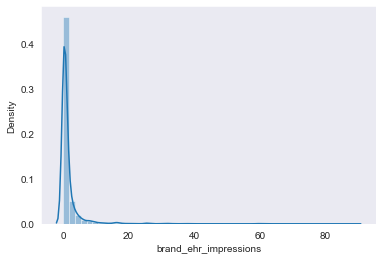

20.851269063730296


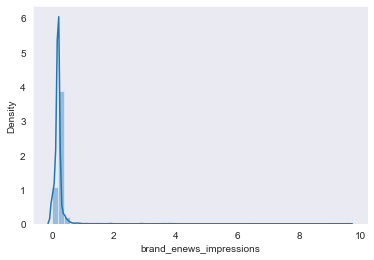

21.60771389886807


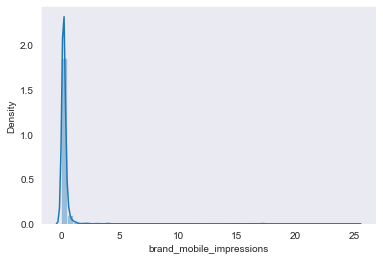

-3.021542780580924


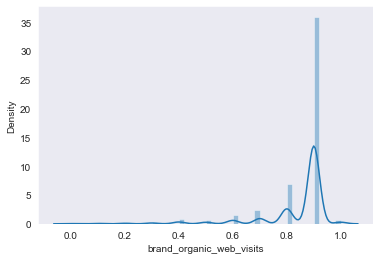

-19.688764621647966


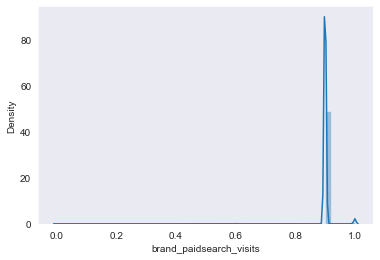

3.6067215583868104


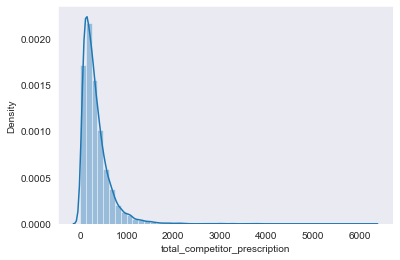

In [312]:
#Cheking skewness
print(df.columns)
for i in df.columns:
    sns.distplot(df[i])
    print(df[i].skew())
    plt.show()

In [313]:
#Skewness is present in most of columns 

physician_id                                               AxesSubplot(0.125,0.71587;0.0731132x0.16413)
urban_population_perc_in_physician_locality             AxesSubplot(0.212736,0.71587;0.0731132x0.16413)
percent_population_with_health_insurance_in_last10q     AxesSubplot(0.300472,0.71587;0.0731132x0.16413)
physician_gender                                        AxesSubplot(0.388208,0.71587;0.0731132x0.16413)
physician_tenure                                        AxesSubplot(0.475943,0.71587;0.0731132x0.16413)
physician_age                                           AxesSubplot(0.563679,0.71587;0.0731132x0.16413)
physician_speciality                                    AxesSubplot(0.651415,0.71587;0.0731132x0.16413)
new_prescriptions                                       AxesSubplot(0.739151,0.71587;0.0731132x0.16413)
brand_prescribed                                        AxesSubplot(0.826887,0.71587;0.0731132x0.16413)
total_representative_visits                               AxesSu

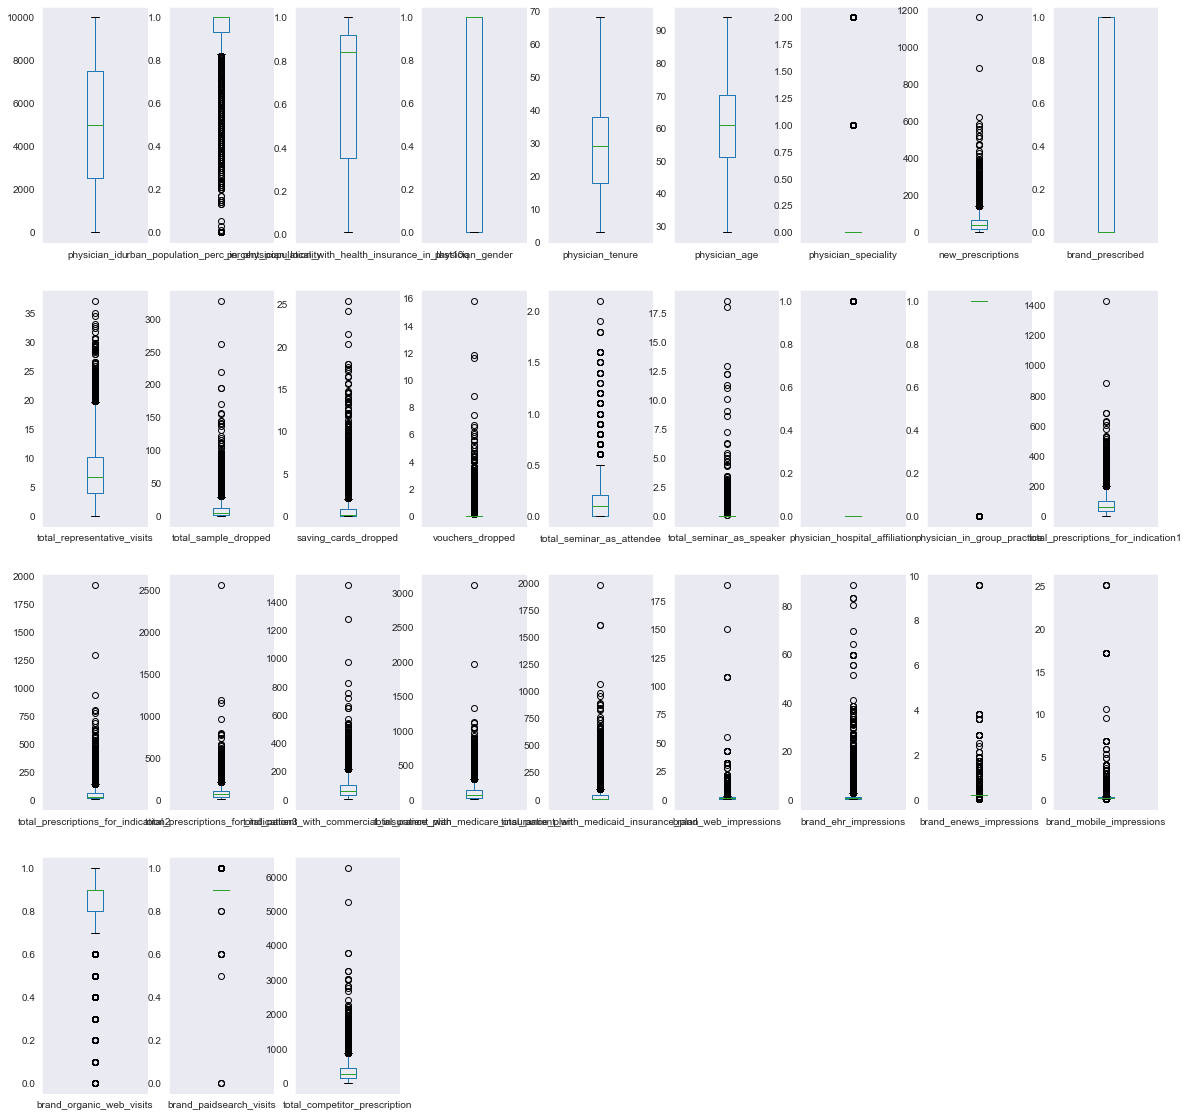

In [314]:
#All have verry good co relation lets check outliers
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(4,9),figsize=(20,20))

# Feature engineering

In [315]:
#lets drop the columns with least corelation
df.drop(["physician_tenure","physician_age","brand_enews_impressions","brand_mobile_impressions","brand_paidsearch_visits","brand_web_impressions","percent_population_with_health_insurance_in_last10q"],axis=1,inplace=True)
df.shape

(10000, 23)

In [316]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df.drop(['physician_gender','physician_speciality','brand_prescribed'],axis=1),nan_policy='omit'))
z

(10000, 23)


array([[1.73187761, 0.06534144, 0.50112604, ..., 0.27089398, 1.06448678,
        0.66277357],
       [1.7315312 , 4.25159523, 0.48973822, ..., 0.36171424, 0.31776282,
        0.57282569],
       [1.73118479, 0.47289119, 0.11761204, ..., 0.24818891, 0.42896114,
        0.71642728],
       ...,
       [1.73118479, 0.47289119, 0.15189964, ..., 0.09238707, 0.42896114,
        0.02913321],
       [1.7315312 , 0.47289119, 0.6509415 , ..., 0.33900917, 0.42896114,
        0.8297682 ],
       [1.73187761, 1.08200308,        nan, ...,        nan,        nan,
               nan]])

In [317]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((10000-7742)/10000)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(7742, 23)
using z score percentage of outlier removed: 22.58


In [318]:
df_new.isnull().sum()

physician_id                                    0
urban_population_perc_in_physician_locality     0
physician_gender                                0
physician_speciality                            0
new_prescriptions                               0
brand_prescribed                                0
total_representative_visits                     0
total_sample_dropped                            0
saving_cards_dropped                            0
vouchers_dropped                                0
total_seminar_as_attendee                       0
total_seminar_as_speaker                        0
physician_hospital_affiliation                  0
physician_in_group_practice                     0
total_prescriptions_for_indication1             0
total_prescriptions_for_indication2             0
total_prescriptions_for_indication3             0
total_patient_with_commercial_insurance_plan    0
total_patient_with_medicare_insurance_plan      0
total_patient_with_medicaid_insurance_plan      0


In [408]:
#This x1 and y1 is for prediction of deaths
x=df_new.drop(labels=["brand_prescribed","physician_id"],axis=1)
y=df_new["brand_prescribed"]

In [409]:
x.shape

(7742, 21)

In [410]:
x.skew()

urban_population_perc_in_physician_locality     -2.341923
physician_gender                                -0.191034
physician_speciality                             1.825374
new_prescriptions                                1.404685
total_representative_visits                      0.643035
total_sample_dropped                             1.981523
saving_cards_dropped                             2.474628
vouchers_dropped                                 4.316768
total_seminar_as_attendee                        1.519006
total_seminar_as_speaker                        11.346004
physician_hospital_affiliation                   1.612088
physician_in_group_practice                      0.000000
total_prescriptions_for_indication1              1.120215
total_prescriptions_for_indication2              1.901164
total_prescriptions_for_indication3              1.351833
total_patient_with_commercial_insurance_plan     1.304356
total_patient_with_medicare_insurance_plan       1.558469
total_patient_

In [411]:
#Removeing the skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))

In [412]:
x=pd.DataFrame(x)
print(x.skew)
print(x.shape)

<bound method DataFrame.skew of             0         1        2         3         4         5         6   \
0    -1.124936  0.909051 -0.54793 -0.314756  0.666900  1.597001 -0.871358   
1     0.694008  0.909051 -0.54793  0.715019  2.042570  1.949747  1.670745   
2    -0.353131  0.909051 -0.54793 -0.552982  0.627386 -0.519097  0.298692   
3     0.694008  0.909051 -0.54793 -1.539133 -0.506537  0.879796  0.985847   
4     0.384637  0.909051 -0.54793  0.830502  0.230344  1.151775 -0.871358   
...        ...       ...      ...       ...       ...       ...       ...   
7737  0.694008  0.909051 -0.54793  0.070601  1.113847  0.545536 -0.871358   
7738 -1.324614 -1.100048 -0.54793 -0.859445 -2.178712 -1.497303 -0.871358   
7739 -1.889859  0.909051 -0.54793  1.947998  0.914826 -0.037880  0.528470   
7740  0.694008 -1.100048 -0.54793  0.344382  0.647192  0.171128 -0.871358   
7741  0.694008 -1.100048 -0.54793  1.273813  1.149083 -0.310896 -0.871358   

            7         8        9   ...   11

In [413]:
x

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.124936,0.909051,-0.54793,-0.314756,0.666900,1.597001,-0.871358,-0.425508,1.598288,-0.11497,...,0.0,-0.617187,-0.304487,-0.929957,-0.790030,0.089180,0.745916,-0.261505,-1.882948,-0.688882
1,0.694008,0.909051,-0.54793,0.715019,2.042570,1.949747,1.670745,-0.425508,0.974291,-0.11497,...,0.0,1.699208,1.305858,1.962947,1.767895,1.238061,0.583785,-0.068252,0.401197,1.304780
2,-0.353131,0.909051,-0.54793,-0.552982,0.627386,-0.519097,0.298692,-0.425508,-0.954285,-0.11497,...,0.0,0.854931,-0.389650,-0.179099,0.907059,0.095280,0.484517,1.610212,0.401197,0.128520
3,0.694008,0.909051,-0.54793,-1.539133,-0.506537,0.879796,0.985847,-0.425508,1.836722,-0.11497,...,0.0,-1.652529,-1.760968,-1.365085,-0.559977,-2.121838,-1.336333,-0.487236,0.401197,-1.840319
4,0.384637,0.909051,-0.54793,0.830502,0.230344,1.151775,-0.871358,-0.425508,0.974291,-0.11497,...,0.0,0.651392,-0.315407,0.235464,1.195325,0.363076,0.277183,-0.487236,0.401197,0.482500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,0.694008,0.909051,-0.54793,0.070601,1.113847,0.545536,-0.871358,-0.425508,1.598288,-0.11497,...,0.0,-0.298006,-0.182432,-0.021856,0.386662,0.298416,-1.336333,-0.068252,-1.204593,-0.139032
7738,-1.324614,-1.100048,-0.54793,-0.859445,-2.178712,-1.497303,-0.871358,-0.425508,-0.954285,-0.11497,...,0.0,-0.646167,-1.172612,-0.934170,-0.449811,-1.298260,1.172567,-0.754085,0.401197,-0.606096
7739,-1.889859,0.909051,-0.54793,1.947998,0.914826,-0.037880,0.528470,2.450857,0.974291,-0.11497,...,0.0,1.546204,0.978690,0.609294,-0.350269,1.881294,1.570907,-0.754085,0.401197,1.836071
7740,0.694008,-1.100048,-0.54793,0.344382,0.647192,0.171128,-0.871358,-0.425508,0.974291,-0.11497,...,0.0,-0.209302,0.725448,1.550548,-0.075969,0.414048,1.614363,1.208502,0.401197,0.550399


In [414]:
#lets standardize the values
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(x))

StandardScaler()


In [415]:
x.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

# Model Building

In [416]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")

In [417]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6193, 21)
(1549, 21)
(6193,)
(1549,)


# LogisticRegression

In [501]:
from sklearn.linear_model import LogisticRegression
Lg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
GS=RandomizedSearchCV(Lg,param_grid,cv=3,scoring='f1_weighted')
GS.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000]},
                   scoring='f1_weighted')

In [502]:
GS.best_params_

{'C': 1}

In [503]:
LG = LogisticRegression(C= 1)
LG.fit(x_train,y_train)
y_pred2 = LG.predict(x_test)

In [506]:
print('Training score =', LG.score(x_train, y_train))
print('Test score =', LG.score(x_test, y_test))

Training score = 0.7713547553689649
Test score = 0.7443511943189154


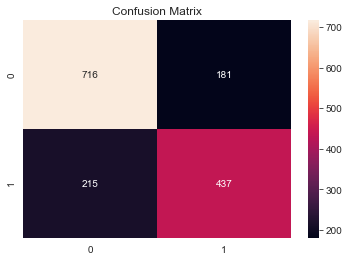

In [507]:
from sklearn.metrics import confusion_matrix
y_pred = LG.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

ROC AUC = 0.8336564964332368


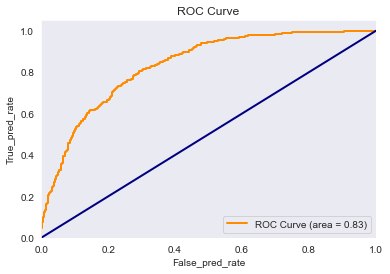

In [508]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred1 = LG.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred1[:,1])
roc_auc = roc_auc_score(y_test,y_pred1[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False_pred_rate')
plt.ylabel('True_pred_rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [509]:
print("classificationreport", classification_report(y_test,y_pred))

classificationreport               precision    recall  f1-score   support

           0       0.77      0.80      0.78       897
           1       0.71      0.67      0.69       652

    accuracy                           0.74      1549
   macro avg       0.74      0.73      0.74      1549
weighted avg       0.74      0.74      0.74      1549



# KNN

In [336]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
GS=RandomizedSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GS.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_weighted')

In [337]:
GS.best_params_

{'weights': 'uniform', 'n_neighbors': 29}

In [338]:
KNN=KNeighborsClassifier(n_neighbors=29,weights='distance')
KNN.fit(x_train,y_train)
y_pred2 = KNN.predict(x_test)

In [339]:
print('Training score =', KNN.score(x_train, y_train))
print('Test score =', KNN.score(x_test, y_test))

Training score = 1.0
Test score = 0.7224015493867011


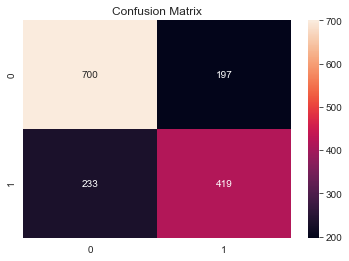

In [340]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [341]:
print("classificationreport", classification_report(y_test,y_pred2))

classificationreport               precision    recall  f1-score   support

           0       0.75      0.78      0.77       897
           1       0.68      0.64      0.66       652

    accuracy                           0.72      1549
   macro avg       0.72      0.71      0.71      1549
weighted avg       0.72      0.72      0.72      1549



# Decision Tree Classifier

In [484]:
dt=DecisionTreeClassifier(random_state=0)
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(x_train,y_train)
GS.best_params_

{'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'gini'}

In [487]:
DT=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=3,random_state=0)
DT.fit(x_train,y_train)
y_pred3=DT.predict(x_test)

In [488]:
print('Training score =', DT.score(x_train, y_train))
print('Test score =', DT.score(x_test, y_test))

Training score = 0.7602131438721137
Test score = 0.7146546158812137


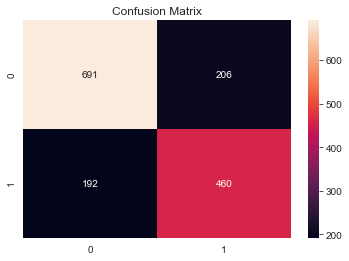

In [469]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [470]:
print("classificationreport", classification_report(y_test,y_pred3))

classificationreport               precision    recall  f1-score   support

           0       0.78      0.77      0.78       897
           1       0.69      0.71      0.70       652

    accuracy                           0.74      1549
   macro avg       0.74      0.74      0.74      1549
weighted avg       0.74      0.74      0.74      1549



# Random Forest Classifier

In [347]:
rf=RandomForestClassifier(random_state=0)
param_grid = { 
            "n_estimators"      : [10,50,100,200,500],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]
            }
GS=RandomizedSearchCV(rf,param_grid,cv=3,scoring='f1_weighted')
GS.fit(x_train,y_train)
GS.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'bootstrap': True}

In [348]:
RF =RandomForestClassifier(bootstrap= True,
 max_features= 'auto',
 min_samples_split= 4,
 n_estimators= 500)
RF.fit(x_train,y_train)
y_pred4=RF.predict(x_test)

In [349]:
print('Training score =', RF.score(x_train, y_train))
print('Test score =', RF.score(x_test, y_test))

Training score = 1.0
Test score = 0.749515816655907


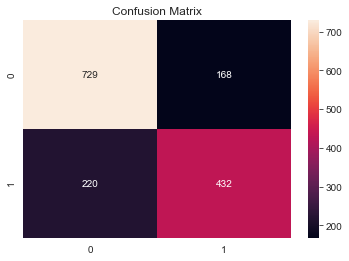

In [350]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [351]:
print("classificationreport", classification_report(y_test,y_pred4))

classificationreport               precision    recall  f1-score   support

           0       0.77      0.81      0.79       897
           1       0.72      0.66      0.69       652

    accuracy                           0.75      1549
   macro avg       0.74      0.74      0.74      1549
weighted avg       0.75      0.75      0.75      1549



# Support vector classifier

In [402]:
svc=SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
GS=RandomizedSearchCV(svc,param_grid,cv=3,scoring='f1_weighted')
GS.fit(x_train,y_train)
GS.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

In [404]:
svc =SVC(kernel= 'rbf', gamma= 0.001, C= 100)
svc.fit(x_train,y_train)
y_pred5=svc.predict(x_test)

In [405]:
print('Training score =', RF.score(x_train, y_train))
print('Test score =', RF.score(x_test, y_test))

Training score = 1.0
Test score = 0.749515816655907


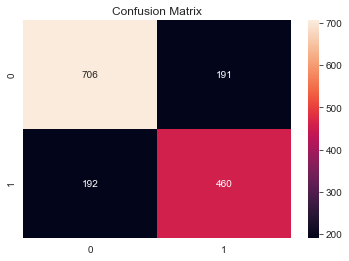

In [406]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [407]:
print("classificationreport", classification_report(y_test,y_pred5))

classificationreport               precision    recall  f1-score   support

           0       0.79      0.79      0.79       897
           1       0.71      0.71      0.71       652

    accuracy                           0.75      1549
   macro avg       0.75      0.75      0.75      1549
weighted avg       0.75      0.75      0.75      1549



In [510]:
#from above all it is found that logistic regressor performs best with about 80% accuracy lets save this model
import pickle
filename="Brand_priscribed_best_algorithm.pkl"
pickle.dump(LG,open(filename,"wb"))

In [454]:
#Now we have our model its time to predict the test data values
df_test=pd.read_csv("Physicians_id.csv")
df_test.head()

,physician_id
0,7
1,9
2,12
3,19
4,20


In [455]:
df_test.shape

(1502, 1)

In [456]:
Df_Test=pd.merge(df_test, df, how='inner', on=['physician_id'])

In [457]:
Df_Test

,physician_id,urban_population_perc_in_physician_locality,physician_gender,physician_speciality,new_prescriptions,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,...,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_ehr_impressions,brand_organic_web_visits,total_competitor_prescription
0,7,0.62,1.0,0.0,4.3,0,7.9,3.1,0.2,0.0,...,1.0,21.6,3.8,12.8,10.1,37.0,3.3,0.0,0.9,62.7
1,9,0.90,1.0,1.0,11.4,0,4.7,1.2,0.8,0.0,...,1.0,24.8,13.0,23.7,34.5,25.1,21.6,0.5,0.9,115.1
2,12,1.00,1.0,1.0,3.8,0,0.5,0.9,0.0,0.0,...,1.0,12.1,2.2,7.0,18.4,8.3,2.8,0.2,0.9,37.5
3,19,1.00,1.0,0.0,9.4,0,6.8,1.5,0.3,0.0,...,1.0,21.6,4.5,21.6,49.2,7.8,0.0,1.5,0.9,85.8
4,20,1.00,1.0,0.0,16.0,0,0.4,0.2,0.3,0.0,...,1.0,38.4,9.8,27.2,53.7,45.9,0.2,0.3,0.9,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,9957,1.00,1.0,0.0,21.4,0,6.1,1.8,0.0,0.0,...,1.0,50.1,59.1,56.1,18.7,102.2,93.1,0.7,0.9,273.0
1498,9963,0.91,0.0,0.0,27.2,0,0.3,0.0,0.0,0.0,...,1.0,55.3,33.0,50.7,59.7,67.4,5.6,0.1,0.8,254.6
1499,9982,0.74,0.0,0.0,48.7,0,0.6,0.0,0.0,0.1,...,1.0,90.2,173.7,85.2,16.4,221.5,18.3,6.7,0.9,609.4
1500,9988,0.94,0.0,0.0,25.2,0,6.4,1.7,0.0,0.0,...,1.0,62.3,16.2,38.0,71.9,81.0,0.0,0.1,0.9,212.9


In [458]:
#checking the data types
Df_Test.dtypes

physician_id                                      int64
urban_population_perc_in_physician_locality     float64
physician_gender                                float64
physician_speciality                            float64
new_prescriptions                               float64
brand_prescribed                                  int64
total_representative_visits                     float64
total_sample_dropped                            float64
saving_cards_dropped                            float64
vouchers_dropped                                float64
total_seminar_as_attendee                       float64
total_seminar_as_speaker                        float64
physician_hospital_affiliation                  float64
physician_in_group_practice                     float64
total_prescriptions_for_indication1             float64
total_prescriptions_for_indication2             float64
total_prescriptions_for_indication3             float64
total_patient_with_commercial_insurance_plan    

In [459]:
Df_Test.isnull().sum()

physician_id                                    0
urban_population_perc_in_physician_locality     0
physician_gender                                0
physician_speciality                            0
new_prescriptions                               0
brand_prescribed                                0
total_representative_visits                     0
total_sample_dropped                            0
saving_cards_dropped                            0
vouchers_dropped                                0
total_seminar_as_attendee                       0
total_seminar_as_speaker                        0
physician_hospital_affiliation                  0
physician_in_group_practice                     0
total_prescriptions_for_indication1             0
total_prescriptions_for_indication2             0
total_prescriptions_for_indication3             0
total_patient_with_commercial_insurance_plan    0
total_patient_with_medicare_insurance_plan      0
total_patient_with_medicaid_insurance_plan      0


In [460]:
Df_Test.drop(["brand_prescribed","physician_id"],axis=1,inplace=True)

In [461]:
Df_Test.isnull().sum()

urban_population_perc_in_physician_locality     0
physician_gender                                0
physician_speciality                            0
new_prescriptions                               0
total_representative_visits                     0
total_sample_dropped                            0
saving_cards_dropped                            0
vouchers_dropped                                0
total_seminar_as_attendee                       0
total_seminar_as_speaker                        0
physician_hospital_affiliation                  0
physician_in_group_practice                     0
total_prescriptions_for_indication1             0
total_prescriptions_for_indication2             0
total_prescriptions_for_indication3             0
total_patient_with_commercial_insurance_plan    0
total_patient_with_medicare_insurance_plan      0
total_patient_with_medicaid_insurance_plan      0
brand_ehr_impressions                           0
brand_organic_web_visits                        0


In [462]:
#Removeing the skewness
from sklearn.preprocessing import power_transform
df_new_test=power_transform(Df_Test,method=("yeo-johnson"))

In [463]:
#lets standardize the values
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(df_new_test))

StandardScaler()


In [464]:
df_new_test

array([[-2.04278835,  0.89014761, -0.51824674, ..., -1.42199153,
         0.46765247, -1.27484133],
       [-0.86588236,  0.89014761,  1.92868021, ...,  0.04781266,
         0.46765247, -0.64209116],
       [ 0.67270716,  0.89014761,  1.92868021, ..., -0.66529071,
         0.46765247, -1.77091268],
       ...,
       [-1.81984629, -1.12340918, -0.51824674, ...,  1.92023316,
         0.46765247,  1.36987468],
       [-0.38140006, -1.12340918, -0.51824674, ..., -1.00419864,
         0.46765247,  0.05160171],
       [-0.96596107, -1.12340918, -0.51824674, ..., -0.66529071,
         0.46765247, -0.37803417]])

In [511]:
#lets import the saved model and predict the values
filename= pickle.load( open( "Brand_priscribed_best_algorithm.pkl", "rb" ) )
filename

LogisticRegression(C=1)

In [512]:
#lets predict the values
test_predict=filename.predict(df_new_test)
test_predict

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [513]:
test_predict=pd.DataFrame(test_predict).rename(columns = {0 : "Predicted drug adoption class"})
test_predict

,Predicted drug adoption class
0,1
1,0
2,0
3,1
4,0
...,...
1497,0
1498,0
1499,0
1500,1


In [514]:
physician_id=pd.DataFrame(df_test["physician_id"])

In [515]:
final_result=pd.concat([physician_id, test_predict], axis=1)
final_result

,physician_id,Predicted drug adoption class
0,7,1
1,9,0
2,12,0
3,19,1
4,20,0
...,...,...
1497,9957,0
1498,9963,0
1499,9982,0
1500,9988,1


In [516]:
Result=final_result["Predicted drug adoption class"]

In [517]:
#lets save the result

In [518]:
Result.to_csv('predictions.csv',index=False)